[0.  0.2 0.4 0.6 0.8 1. ]
[-2.46935726e-16 -1.60069846e-01 -1.95865630e-01 -1.52952827e-01
 -7.64397790e-02  0.00000000e+00]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 1.46089666e-16 -9.64156800e-02 -1.57483141e-01 -1.87835190e-01
 -1.92950756e-01 -1.78709817e-01 -1.50941652e-01 -1.15027628e-01
 -7.56009312e-02 -3.63611408e-02  0.00000000e+00]


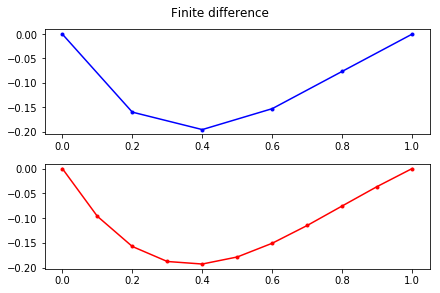

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

def p1(x):
    return x*x*x + 1

def q1(x):
    return 1 - x * x

def f1(x):
    return np.exp(1 - 2.5 * x * x)

def p2(x):
    return 1.0 / x

def q2(x):
    return 0.0

def f2(x):
    return 1.0 / (x * x)

def finitedifferencemethod(p, q, f, a, b, ya ,yb, alpha, beta, n):
    h = (b - a) / float(n)
    x = list()
    d = list()
    for i in range(0, (n + 1)):
        x.append(a + float(i) * h)
        d.append(float(i) + 1.0)
    x = np.array(x)
    C = np.zeros((n + 1, n + 1), order='C')
    d = np.array(d)
    
    C[0][0] = alpha[0] * h + alpha[1]
    C[0][1] = alpha[1]
    d[0] = ya * h
    
    for i in range(1, n):
        C[i][i - 1] = 1 - h * p(x[i]) / 2.0
        C[i][i] = h * h * q(x[i]) - 2.0
        C[i][i + 1] = 1 + h * p(x[i]) / 2.0
        d[i] = f(x[i]) * h * h
    
    C[n][n - 1] = -beta[1]
    C[n][n] = beta[0] * h + beta[1]
    d[n] = yb * h
    
    y = np.linalg.solve(C, d)
   
    return x, y
    
a1, b1 = 0.0, 1.0
ya1, yb1 = 0.0, 0.0
alpha1 = np.array([1.0, 0.0])
beta1 = np.array([1.0, 0.0])
resultx1, resulty1 = finitedifferencemethod(p1, q1, f1, a1, b1, ya1 ,yb1, alpha1, beta1, 5)
resultx2, resulty2 = finitedifferencemethod(p1, q1, f1, a1, b1, ya1 ,yb1, alpha1, beta1, 10)

# a2, b2 = 1.0, 1.4
# ya2, yb2 = 0.0, 0.05661
# alpha2 = np.array([1.0, 0.0])
# beta2 = np.array([1.0, 0.0])
# resultx1, resulty1 = finitedifferencemethod(p2, q2, f2, a2, b2, ya2, yb2, alpha2, beta2, 5)
# resultx2, resulty2 = finitedifferencemethod(p2, q2, f2, a2, b2, ya2, yb2, alpha2, beta2, 10)

fig, axs = plt.subplots(2, constrained_layout=True)
fig.suptitle("Finite difference")
axs[0].plot(resultx1, resulty1, 'b.-')
axs[1].plot(resultx2, resulty2, 'r.-')
plt.plot()
print(resultx1) 
print(resulty1)
print(resultx2) 
print(resulty2)